<a href="https://colab.research.google.com/github/BeataStultica/II_graphic_collab/blob/main/Laba6_numb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from keras.datasets import mnist
(train_images, traain_labels), (test_imaes, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(train_images[1])


In [20]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_imaes = test_imaes.reshape((10000,28*28))
test_imaes = test_imaes.astype('float32')/255

In [21]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))


In [22]:
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
network.fit(train_images, traain_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2539 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.1029 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0678 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0494 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0366 - accuracy: 0.9891


In [24]:
test_loss, test_acc = network.evaluate(test_imaes, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0670 - accuracy: 0.9798


In [25]:
network.save('laba6_numb.h5')

# Пункт 2 - CIFAR10


In [30]:
import numpy as np
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def unpickle(file):
 with open(file, 'rb') as f:
  data = pickle.load(f, encoding='latin-1')
  return data
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

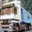

In [31]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_train[1])

In [32]:
print('X_train shape:', X_train.shape)
print('y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', Y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [33]:
X_train_unshuf_unscaled = X_train
X_train_unshuf_reshaped_unscaled=X_train_unshuf_unscaled.reshape(50000,32*3*32)
X_train_unshuf_reshaped_unscaled

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=uint8)

In [34]:
X_train = X_train.reshape((50000,32*32*3))
X_train = X_train.astype('float32')/255
X_test = X_test.reshape((10000,32*32*3))
X_test = X_test.astype('float32')/255

In [35]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(32*32*3,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [36]:
network.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
print('X_train shape:', X_train.shape)
print('y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', Y_test.shape)

X_train shape: (50000, 3072)
y_train shape: (50000, 1)
X_test shape: (10000, 3072)
y_test shape: (10000, 1)


In [14]:
network.fit(X_train, Y_train, epochs=15, batch_size=128)

Epoch 1/15
391/391 [==============================] - 13s 33ms/step - loss: 1.4952 - accuracy: 0.4700
Epoch 2/15
391/391 [==============================] - 13s 33ms/step - loss: 1.4734 - accuracy: 0.4747
Epoch 3/15
391/391 [==============================] - 13s 33ms/step - loss: 1.4543 - accuracy: 0.4802
Epoch 4/15
391/391 [==============================] - 13s 33ms/step - loss: 1.4362 - accuracy: 0.4909
Epoch 5/15
391/391 [==============================] - 13s 33ms/step - loss: 1.4195 - accuracy: 0.4951
Epoch 6/15
391/391 [==============================] - 13s 33ms/step - loss: 1.4010 - accuracy: 0.5032
Epoch 7/15
391/391 [==============================] - 13s 33ms/step - loss: 1.3872 - accuracy: 0.5071
Epoch 8/15
391/391 [==============================] - 13s 34ms/step - loss: 1.3727 - accuracy: 0.5114
Epoch 9/15
391/391 [==============================] - 13s 34ms/step - loss: 1.3579 - accuracy: 0.5178
Epoch 10/15
391/391 [==============================] - 13s 34ms/step - loss: 1.343

In [15]:
test_loss, test_acc = network.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3593 - accuracy: 0.5163


In [16]:
network.save('laba6_cifar.h5')